# Dogs vs Cats Redux

First we need to create a directory structure and get a small sample of training and validation data using bash makeDirStruct.sh

In [119]:
import os
cwd = os.getcwd()

In [120]:
main_path = cwd + "\\data\\dogscats\\"
data_path = cwd + "\\data\\dogscats\\sample\\"
#data_path = "data/dogscats/"
test_path = data_path + "test\\"

In [121]:
main_path = cwd + "/data/dogscats/"
#data_path = "data/dogscats/sample/"
data_path = "data/dogscats/"
test_path = data_path + "test/"

Load utils and initialize custom Tensorflow session for Keras

In [122]:
%matplotlib inline
from imp import reload
import utils; reload(utils)
from utils import *

In [123]:
batch_size=100

# Finetune and train

In [124]:
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [125]:
vgg = Vgg16()

/home/marozet/courses/deeplearning1/nbs/vgg16.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
/home/marozet/courses/deeplearning1/nbs/vgg16.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
/home/marozet/courses/deeplearning1/nbs/vgg16.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))
/home/marozet/courses/deeplearning1/nbs/vgg16.py:105: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  model.add(Convolution2D(filters, 3, 3, activation='relu'))


In [126]:
batches = vgg.get_batches(data_path+'train',batch_size=batch_size)
val_batches = vgg.get_batches(data_path+'valid', batch_size=batch_size)
vgg.finetune(batches)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [127]:
vgg.model.load_weights(main_path+'results/ft1.h5')

In [64]:
vgg.fit(batches,val_batches,nb_epoch=1,steps_per_epoch=batches.samples // batch_size, validation_steps=val_batches.samples // batch_size)

/home/marozet/courses/deeplearning1/nbs/vgg16.py:218: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  validation_data=val_batches, validation_steps=validation_steps)
/home/marozet/courses/deeplearning1/nbs/vgg16.py:218: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=230, validation_data=<keras.pre..., epochs=1, validation_steps=20)`
  validation_data=val_batches, validation_steps=validation_steps)


Epoch 1/1
230/230 [==============================] - 510s - loss: 0.4180 - acc: 0.8704 - val_loss: 0.2686 - val_acc: 0.9085

The computation is run on NVIDIA Tesla K80 with around 11GB RAM. As seen below Tensorflow session keeps the memory allocation.

In [128]:
!nvidia-smi

Wed Aug 16 20:01:07 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 367.48                 Driver Version: 367.48                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 1EE5:00:00.0     Off |                    0 |
| N/A   45C    P0    72W / 149W |   2263MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [66]:
vgg.model.save_weights(main_path+'results/ft1.h5')

In [2]:
vgg.model.load_weights(main_path+'results/ft1.h5')

NameError: name 'vgg' is not defined

In [13]:
#Windows version
vgg.model.load_weights(main_path+'results\\ft1.h5')

In [129]:
test_batches = vgg.get_batches(test_path,shuffle=False,batch_size=batch_size,class_mode=None)
print(test_batches.samples)

Found 12500 images belonging to 1 classes.
12500


In [130]:
prediction = vgg.model.predict_generator(test_batches, steps = test_batches.samples // (batch_size), verbose=1)

125/125 [==============================] - 273s      

In [132]:
filenames = test_batches.filenames
print(len(filenames))

12500


In [133]:
print(prediction.shape)
print(prediction[:5])
prediction_trim = prediction[:len(filenames)]
print(prediction_trim.shape)

(12500, 2)
[[  9.9180e-01   8.2034e-03]
 [  7.9548e-01   2.0452e-01]
 [  1.0000e+00   1.6096e-06]
 [  3.0630e-03   9.9694e-01]
 [  3.2802e-03   9.9672e-01]]
(12500, 2)


In [134]:
prediction_clip = np.clip(prediction_trim,0.025,0.975)
prediction_clip[:5]

array([[ 0.975 ,  0.025 ],
       [ 0.7955,  0.2045],
       [ 0.975 ,  0.025 ],
       [ 0.025 ,  0.975 ],
       [ 0.025 ,  0.975 ]], dtype=float32)

In [135]:
filenames[:5]

['unknown/1164.jpg',
 'unknown/9896.jpg',
 'unknown/2934.jpg',
 'unknown/6651.jpg',
 'unknown/7220.jpg']

In [131]:
#Windows version
#from PIL import Image
#Image.open(test_path.replace("/","\\")+filenames[0])

unknown/1164.jpg


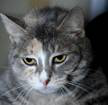

In [136]:
from PIL import Image
#print(prediction[0])
print(filenames[0])
Image.open(test_path+filenames[0])

In [138]:
isdog = prediction_clip[:,1]
isdog[:5]

array([ 0.025 ,  0.2045,  0.025 ,  0.975 ,  0.975 ], dtype=float32)

In [139]:
import re
pattern = re.compile('\d+')
ids = [pattern.search(x).group() for x in filenames]
ids[-5:]


['2590', '9072', '3998', '6456', '137']

In [140]:
print(len(ids))
print(len(isdog))

12500
12500


        label
id           
1164  0.02500
9896  0.20452
2934  0.02500
6651  0.97500
7220  0.97500


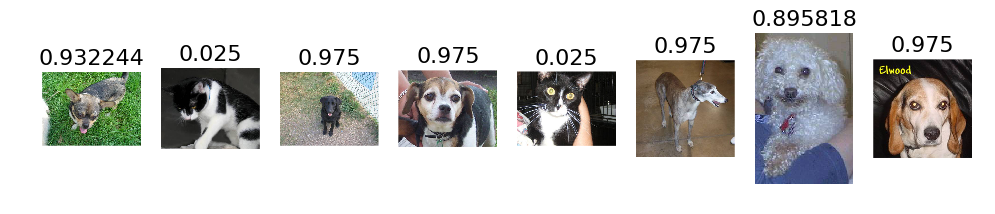

In [147]:
def plot_idx(idx, titles=None):
    plots([image.load_img(data_path + 'test/' + i) for i in idx], titles=titles)
n_view=8

df = pd.DataFrame({'id':ids,'label':isdog})
df['id'] = df['id'].astype(int)
df = df.set_index('id')
print(df.head())
f_names = permutation(filenames)[:n_view]
idx = [pattern.search(x).group() for x in f_names]
plot_idx(f_names,list(df.loc[np.array(idx).astype(int),'label']))


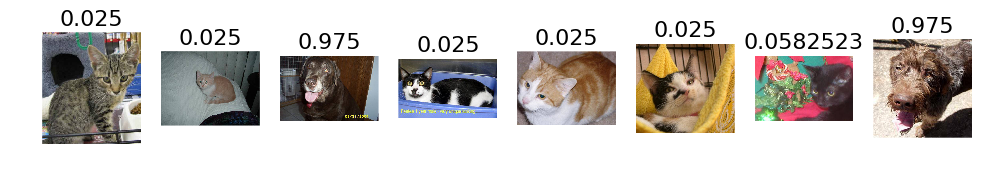

In [148]:
f_names = permutation(filenames)[:n_view]
idx = [pattern.search(x).group() for x in f_names]
plot_idx(f_names,list(df.loc[np.array(idx).astype(int),'label']))

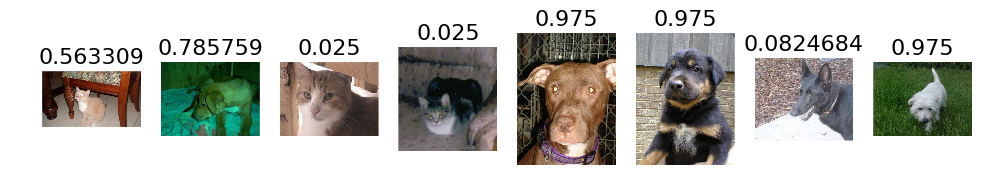

In [161]:
f_names = permutation(filenames)[:n_view]
idx = [pattern.search(x).group() for x in f_names]
plot_idx(f_names,list(df.loc[np.array(idx).astype(int),'label']))

In [144]:
type(df.index[0])

str

In [149]:
import pandas as pd
subm_df = pd.DataFrame({'id':ids,'label':isdog})
subm_df.head()

,id,label
0,1164,0.02500
1,9896,0.20452
2,2934,0.02500
3,6651,0.97500
4,7220,0.97500


In [150]:
subm_df.tail()

,id,label
12495,2590,0.975000
12496,9072,0.045241
12497,3998,0.950738
12498,6456,0.025000
12499,137,0.975000


In [160]:
subm_df['id'] = subm_df['id'].astype(int)
subm_df['label'] = np.round(subm_df['label'],5)
print(subm_df.info())
print(subm_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 2 columns):
id       12500 non-null int64
label    12500 non-null float32
dtypes: float32(1), int64(1)
memory usage: 146.6 KB
None
     id    label
0  1164  0.02500
1  9896  0.20452
2  2934  0.02500
3  6651  0.97500
4  7220  0.97500


In [167]:
subm_df.to_csv(main_path + 'results/' + 'subm008.csv',index=False, float_format='%.5f')

In [168]:
from IPython.display import FileLink
FileLink('data/dogscats/results/' + 'subm008.csv')

/home/marozet/courses/deeplearning1/nbs/data/dogscats/results/subm008.csv

In [39]:
subm_df = pd.read_csv(main_path + 'results/' + 'subm002.csv')
print(subm_df.info())
subm_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 2 columns):
id       12500 non-null int64
label    12500 non-null float64
dtypes: float64(1), int64(1)
memory usage: 195.4 KB
None


,id,label
0,1164,0.025000
1,9896,0.025000
2,2934,0.933046
3,6651,0.975000
4,7220,0.975000


In [41]:
subm_df.loc[:,'label'] = 1 - subm_df['label']
#subm_df.columns = ['iid','label']
subm_df.loc[:,'label'] = np.round(subm_df['label'],5)
subm_df.sort_values('id',inplace=True)
subm_df.head()

,id,label
1468,1,0.97500
11340,2,0.02500
3512,3,0.03158
2967,4,0.02500
453,5,0.93526


In [42]:
subm_df.to_csv(main_path + 'results/' + 'subm005.csv',index=False)

In [43]:
from IPython.display import FileLink
FileLink('data/dogscats/results/' + 'subm005.csv')

/home/marozet/courses/deeplearning1/nbs/data/dogscats/results/subm005.csv

# Visualize results

In [139]:
vgg.model.load_weights(main_path+'results/ft1.h5')
batch_size=100
val_batches2 = vgg.get_batches(data_path+'valid', shuffle=False, batch_size=batch_size, class_mode=None)
val_probs = vgg.model.predict_generator(val_batches2, steps = val_batches2.samples // (batch_size),verbose=1)

Found 2000 images belonging to 2 classes.
20/20 [==============================] - 40s     

In [140]:
val_labels = val_batches2.classes
val_filenames = val_batches2.filenames

In [141]:
val_isCat_probs = val_probs[:,0]
val_preds = np.round(1-val_isCat_prob)
val_isCat_probs[:5]

array([ 1.    ,  0.9068,  1.    ,  1.    ,  0.9908], dtype=float32)

In [142]:
val_preds[:5]

array([ 0.,  0.,  0.,  0.,  0.], dtype=float32)

In [143]:
#Number of images to check
n_view = 4

Helped function for plotting images and probabilities

In [66]:
def plot_idx(idx, titles=None):
    plots([image.load_img(data_path + 'valid/' + val_filenames[i]) for i in idx], titles=titles)

Plot correct predictions

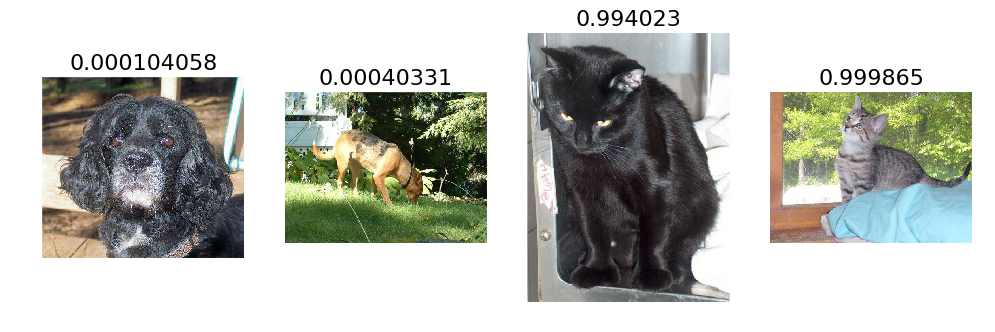

In [145]:
correct = np.where(val_preds == val_labels)[0]
idx = permutation(correct)[:n_view]
plot_idx(idx,val_isCat_probs[idx])

Plot a few incorrect predictions

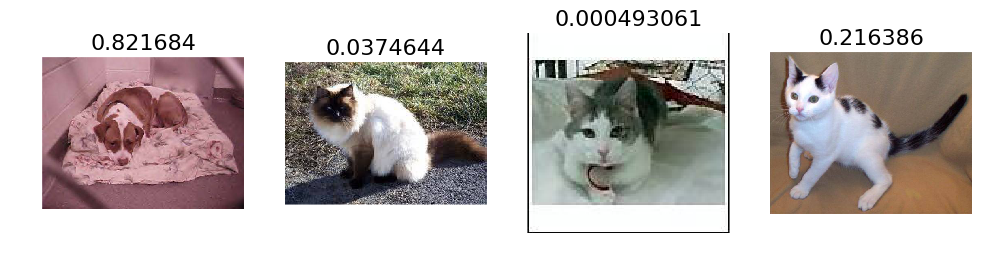

In [117]:
incorrect = np.where(val_preds != val_labels)[0]
idx = permutation(incorrect)[:n_view]
plot_idx(idx,val_isCat_probs[idx])

Plot confident predictions for cats

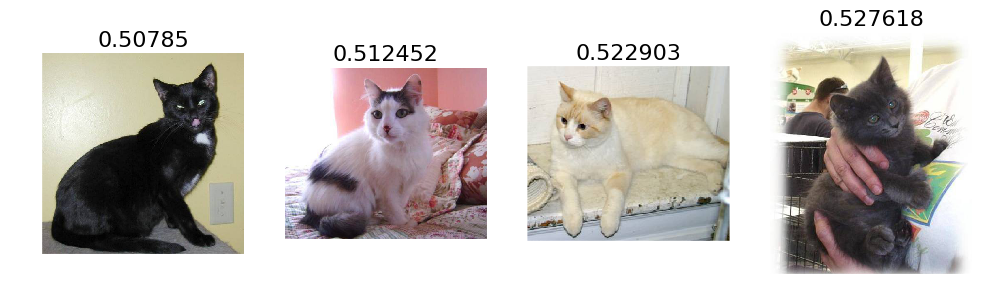

In [123]:
correct_cats = np.where((val_preds==0) & (val_preds==val_labels))[0]
most_correct_cats = np.argsort(val_isCat_probs[correct_cats])[:n_view:]
plot_idx(correct_cats[most_correct_cats], val_isCat_probs[correct_cats][most_correct_cats])

Plot confident predictions for dogs

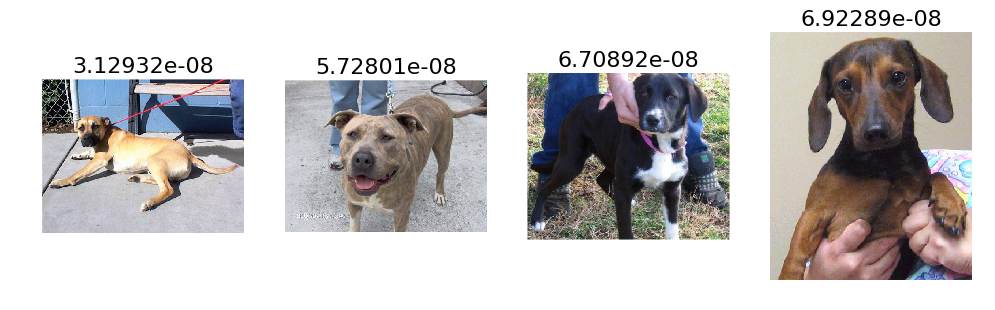

In [125]:
correct_dogs = np.where((val_preds==1) & (val_preds==val_labels))[0]
most_correct_dogs = np.argsort(val_isCat_probs[correct_dogs])[:n_view]
plot_idx(correct_dogs[most_correct_dogs], val_isCat_probs[correct_dogs][most_correct_dogs])

Plot incorrectly predicted cats

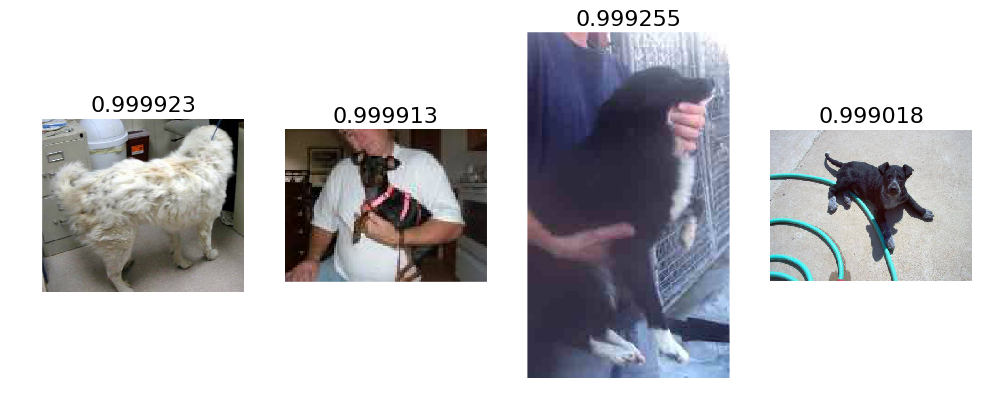

In [130]:
incorrect_cats = np.where((val_preds==0) & (val_preds != val_labels))[0]
most_incorrect_cats = np.argsort(val_isCat_probs[incorrect_cats])[::-1][:n_view]
plot_idx(incorrect_cats[most_incorrect_cats], val_isCat_probs[incorrect_cats][most_incorrect_cats])

Plot incorrectly predicted dogs

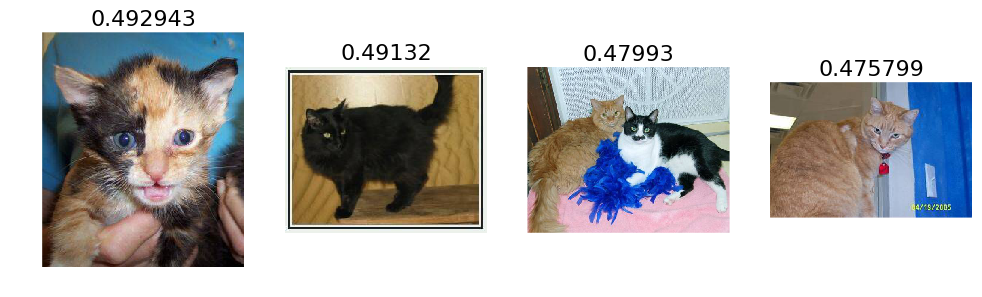

In [132]:
incorrect_dogs = np.where((val_preds==1) & (val_preds != val_labels))[0]
most_incorrect_dogs = np.argsort(val_isCat_probs[incorrect_dogs])[::-1][:n_view]
plot_idx(incorrect_dogs[most_incorrect_dogs], val_isCat_probs[incorrect_dogs][most_incorrect_dogs])

Plot the most uncertain predictions

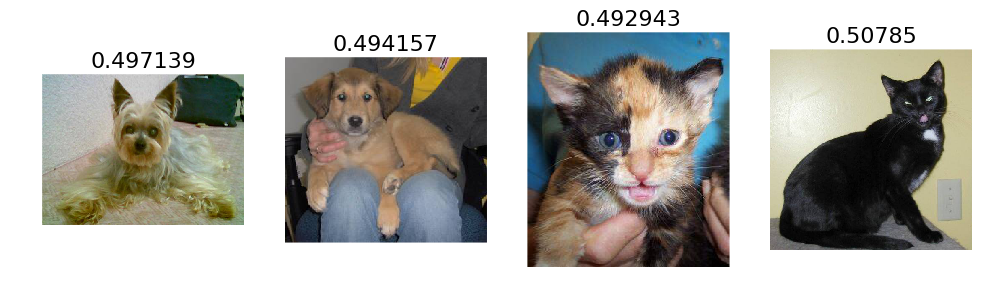

In [133]:
most_uncertain = np.argsort(np.abs(val_isCat_probs-0.5))
plot_idx(most_uncertain[:n_view], val_isCat_probs[most_uncertain][:n_view])

[[947  53]
 [130 870]]


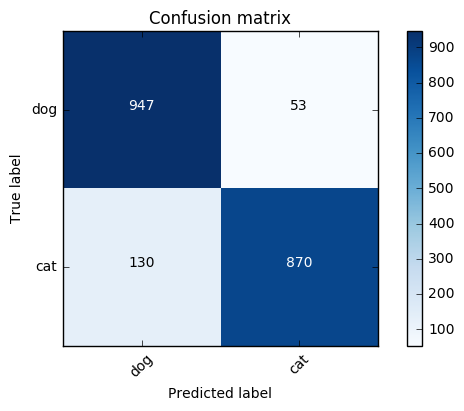

In [148]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(val_labels,val_preds)
plot_confusion_matrix(cm, val_batches2.class_indices)

In [150]:
from sklearn.metrics import classification_report
print(classification_report(val_labels,val_preds))

             precision    recall  f1-score   support

          0       0.88      0.95      0.91      1000
          1       0.94      0.87      0.90      1000

avg / total       0.91      0.91      0.91      2000

